In [1]:
#importing the all required libs
import numpy as np 
import os 
import PIL 
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds 

In [2]:
#importing the training and testing data 
import pathlib
train_data_dir = pathlib.Path('Train')
test_data_dir = pathlib.Path('Test')

In [3]:
train_img_count = len(list(train_data_dir.glob('*/*.jpg')))
print("Train Images",train_img_count)

test_img_count = len(list(test_data_dir.glob('*/*.jpg')))
print("Test Images",test_img_count)

Train Images 27455
Test Images 7172


In [4]:
Asigns = list(train_data_dir.glob('A/*'))
PIL.Image.open(str(Asigns[5]))

In [5]:
BATCH_SIZE = 32
img_height = 28
img_width = 28

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset = "training",
    seed = 42,
    image_size = (img_height,img_width),
    batch_size = BATCH_SIZE
    
)

Found 27455 files belonging to 24 classes.
Using 21964 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset = "validation",
    seed = 42,
    image_size = (img_height,img_width),
    batch_size = BATCH_SIZE
    
)

Found 27455 files belonging to 24 classes.
Using 5491 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [9]:
len(class_names)

24

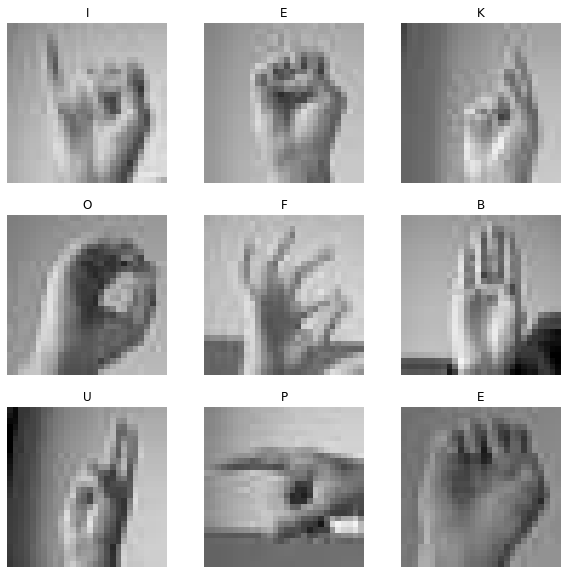

In [10]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))
for imgs,labels in train_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3,3, i + 1)
        plt.imshow(imgs[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 28, 28, 3)
(32,)


In [12]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
imgs_batch, labels_batch = next(iter(normalized_ds))
first_image = imgs_batch[0]
print(np.min(first_image), np.max(first_image))

0.050980397 0.8470589


In [14]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)    

In [15]:
#defining the model 

num_classes = 24

model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(28 , 3),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(28 , 3),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(28 , 3),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [16]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [17]:
history = model.fit(train_ds, epochs = 10, validation_data = val_ds)

Epoch 1/10
687/687 [==============================] - 9s 13ms/step - loss: 1.3644 - accuracy: 0.5738 - val_loss: 0.3973 - val_accuracy: 0.8729
Epoch 2/10
687/687 [==============================] - 7s 11ms/step - loss: 0.1916 - accuracy: 0.9410 - val_loss: 0.0969 - val_accuracy: 0.9710
Epoch 3/10
687/687 [==============================] - 7s 10ms/step - loss: 0.0405 - accuracy: 0.9914 - val_loss: 0.0272 - val_accuracy: 0.9940
Epoch 4/10
687/687 [==============================] - 7s 10ms/step - loss: 0.0227 - accuracy: 0.9944 - val_loss: 0.0522 - val_accuracy: 0.9809
Epoch 5/10
687/687 [==============================] - 6s 8ms/step - loss: 0.0335 - accuracy: 0.9897 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 6/10
687/687 [==============================] - 7s 11ms/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0247 - val_accuracy: 0.9920
Epoch 7/10
687/687 [==============================] - 7s 11ms/step - loss: 0.0357 - accuracy: 0.9898 - val_loss: 0.0024 - val_accuracy: 0.9998


In [18]:
def plot_graph(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' +metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

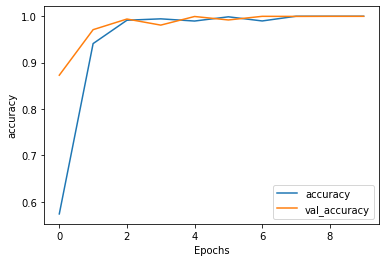

In [19]:
plot_graph(history,'accuracy')

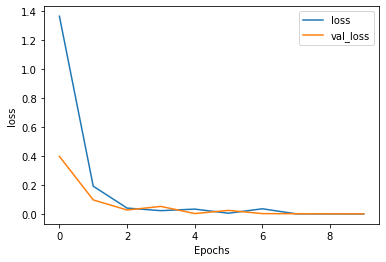

In [20]:
plot_graph(history,'loss')

In [21]:
model.save('hand_signs_classification.h5')

In [22]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    seed = 42,
    image_size = (img_height,img_width),
    batch_size = BATCH_SIZE
    
)

Found 7172 files belonging to 24 classes.


In [23]:
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [24]:
model.evaluate(train_ds)

225/225 [==============================] - 1s 4ms/step - loss: 0.7444 - accuracy: 0.8530


[0.7444097995758057, 0.8530396223068237]